In [52]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor







In [53]:
import numpy as np 

In [2]:
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-10-27 09:40:41,964: Credentials already present. Set overwrite=True to overwrite.


In [3]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
api = 'e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d'

In [5]:
import numpy as np


def Pauli(j):
    if j == 0:
        return np.array([[1, 0], [0, 1]])
    elif j == 1:
        return np.array([[0, 1], [1, 0]])
    elif j == 2:
        return np.array([[0, -1j], [1j, 0]])
    elif j == 3:
        return np.array([[1, 0], [0, -1]])




In [6]:
def trace(A):
    tr = 0
    for i in range(len(A)):
        tr+= A[i][i] 
    return(tr)



In [7]:
def normTr(d, A):
    ev = np.linalg.eigvalsh(A)
    Ntr = 0
    for j in range(0, d):
        Ntr += abs(ev[j]) #calculate the sum of all absolute values 
    return Ntr

In [8]:
z = np.array([1,0])
o = np.array([0,1])

lst = [z,o]

def function(A): #function refers to reconstruction of density operator between two qubits
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    M = M + A[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [9]:
def negativity(d, rhoTp):
    En = 0.5*(normTr(d, rhoTp) - 1.0)
    return En





In [45]:
#maximizing a  bell state:
#This cell makes measurements in x,y,and z bases 



#n is number of qubits
n = 2
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = []

for i in range(3**n):
    qc.append(QuantumCircuit(q, c))
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].h(0)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].cx(0,1)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    
    


count = 0 #count refers to the total number of circuits.
for i in range(3):
    for j in range(3):
        if i == 0: 
            qc[count].h(0)
        elif i == 1:
            qc[count].s(0).inverse()
            qc[count].h(0)
        if j == 0:
            qc[count].h(1)
        elif j == 1:
            qc[count].s(1).inverse()
            qc[count].h(1)
        count += 1
        
for i in range(3**n):
    qc[i].measure(q,c)

  



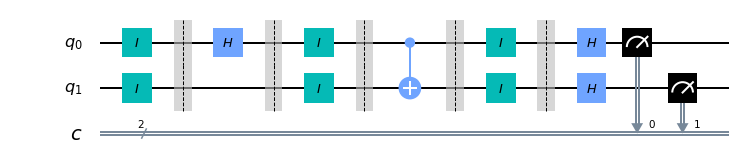

In [46]:
qc[0].draw(output = 'mpl')

#Automation planning:
1) Place id_gates in 5 positions of the circuit
2) write a code that does this in a single run. 


In [ ]:
count = 0
def n_idgate(n):
    for i in range(n):
        count = count + 1
        qc[count].id(0)
    

In [ ]:

def circuit(n_circ,n_idgate): 
    qc = []
    for i in range(n_circ):  # no. of circuits
        n = 2
        q = QuantumRegister(n, 'q')
        c = ClassicalRegister(n, 'c')
        qc.append(QuantumCircuit(q,c))
        for j in range(n_idgate):
            qc[i].id(0)
            qc[i].id(1)
        qc[i].measure(q,c)
        
    return(qc)
        
    


backend = provider.get_backend('ibmq_ourense')
output = []
for i in range(1,15):
    n = 75 # total number of circuits for each number of identity gates. 
    circ = circuit(n, i)
    job_exp = qiskit.execute(circ,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path + str(i) + 'idgates.csv')
    
    

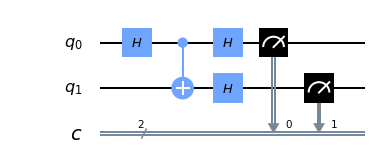

In [12]:
qc[0].draw(output = 'mpl')

In [13]:
backend = provider.get_backend('ibmq_vigo')
from qiskit.providers.ibmq.job import job_monitor
from qiskit.visualization import plot_histogram

job_exp = qiskit.execute(qc,backend=backend)



In [14]:
job_monitor(job_exp)

Job Status: job has successfully run                          


In [ ]:
output = job_exp.result().get_counts()
output

In [48]:


output = [{'10': 45, '01': 12, '11': 489, '00': 478},
 {'10': 250, '01': 212, '11': 240, '00': 322},
 {'10': 271, '01': 246, '11': 240, '00': 267},
 {'10': 270, '01': 225, '11': 247, '00': 282},
 {'10': 483, '01': 467, '11': 15, '00': 59},
 {'10': 255, '01': 216, '11': 247, '00': 306},
 {'10': 268, '01': 224, '11': 235, '00': 297},
 {'10': 253, '01': 221, '11': 215, '00': 335},
 {'10': 57, '01': 15, '11': 428, '00': 524}]

In [49]:
sorted_output = []
for i in range(len(output)):
    sorted_output.append(sorted(output[i].items()))
sorted_output




[[('00', 478), ('01', 12), ('10', 45), ('11', 489)],
 [('00', 322), ('01', 212), ('10', 250), ('11', 240)],
 [('00', 267), ('01', 246), ('10', 271), ('11', 240)],
 [('00', 282), ('01', 225), ('10', 270), ('11', 247)],
 [('00', 59), ('01', 467), ('10', 483), ('11', 15)],
 [('00', 306), ('01', 216), ('10', 255), ('11', 247)],
 [('00', 297), ('01', 224), ('10', 268), ('11', 235)],
 [('00', 335), ('01', 221), ('10', 253), ('11', 215)],
 [('00', 524), ('01', 15), ('10', 57), ('11', 428)]]

In [50]:
ns = 1024
values = []
for i in range(len(sorted_output)):
    for j in range(4):
        values.append(sorted_output[i][j][1]/ns)
values
    

[0.466796875,
 0.01171875,
 0.0439453125,
 0.4775390625,
 0.314453125,
 0.20703125,
 0.244140625,
 0.234375,
 0.2607421875,
 0.240234375,
 0.2646484375,
 0.234375,
 0.275390625,
 0.2197265625,
 0.263671875,
 0.2412109375,
 0.0576171875,
 0.4560546875,
 0.4716796875,
 0.0146484375,
 0.298828125,
 0.2109375,
 0.2490234375,
 0.2412109375,
 0.2900390625,
 0.21875,
 0.26171875,
 0.2294921875,
 0.3271484375,
 0.2158203125,
 0.2470703125,
 0.2099609375,
 0.51171875,
 0.0146484375,
 0.0556640625,
 0.41796875]

In [18]:
#This is the list of probabilities that we get from IBM Q.
p = np.array(values)
p


array([0.46679688, 0.01171875, 0.04394531, 0.47753906, 0.31445312,
       0.20703125, 0.24414062, 0.234375  , 0.26074219, 0.24023438,
       0.26464844, 0.234375  , 0.27539062, 0.21972656, 0.26367188,
       0.24121094, 0.05761719, 0.45605469, 0.47167969, 0.01464844,
       0.29882812, 0.2109375 , 0.24902344, 0.24121094, 0.29003906,
       0.21875   , 0.26171875, 0.22949219, 0.32714844, 0.21582031,
       0.24707031, 0.20996094, 0.51171875, 0.01464844, 0.05566406,
       0.41796875])

In [54]:
#density operator reconstruction begins here. 
d1 = np.eye(4)
ab = [1, -1]
A = []
for i in range(1,4):
    for j in range(1,4):
        for a in ab :
            for b in ab :
                B = []
                for al in range(4):
                    for be in range(4):
                        mat = (d1[al][0] + a* d1[al][i]) * (d1[be][0] + b* d1[be][j])/4
                        #mat = (int(d0[al]) + a* int(d1[i][al])) * (int(d0[be]) + b*int(d1[j][be]))/4 
                        B.append(mat)
                if (i == 1 and a == 1 and j == 1 and b == -1):
                    print(B)
                A.append(B) #We append our matrix here because we need 16 different elements of c_s so that we don't need to reshape
M = np.array(A, dtype = float)
M
B


[0.25, -0.25, 0.0, 0.0, 0.25, -0.25, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]


[0.25,
 0.0,
 0.0,
 -0.25,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.25,
 -0.0,
 -0.0,
 0.25]

In [21]:
M_inv = np.linalg.pinv(M)
M_inv

array([[ 1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01,
         1.11111111e-01,  1.11111111e-01,  1.11111111e-01],
       [ 3.33333333e-01, -3.33333333e-01,  3.33333333e-01,
        -3.33333333e-01,  1.05021906e-17, -2.49459321e-17,
         1.05021906e-17, -2.49459321e-17, -1.74774680e-17,
         3.03372653e-18,  3.03372653e-18, -1.74774680e-17,
         3.33333333e-01, -3.33333333e-01,  3.33333333e-

In [22]:
C = np.matmul(M_inv, p)
C


array([ 1.00000000e+00,  6.77083333e-02,  1.08072917e-01,  9.37500000e-02,
        6.51041667e-04,  8.88671875e-01,  9.76562500e-02, -9.76562500e-03,
        1.23697917e-02,  3.32031250e-02, -8.55468750e-01,  8.00781250e-02,
        5.20833333e-02,  3.90625000e-02,  7.42187500e-02,  8.59375000e-01])

In [23]:
C[3]

0.09374999999999986

In [24]:
#This is the rho equation.
B = []
d = 0
for al in range(4):
    for be in range(4):
        rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
        d = d + 1
        B.append(rho_q2)


B


[array([[0.25, 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.  ],
        [0.  , 0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.  , 0.25]]),
 array([[0.        , 0.01692708, 0.        , 0.        ],
        [0.01692708, 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.01692708],
        [0.        , 0.        , 0.01692708, 0.        ]]),
 array([[0.+0.j        , 0.-0.02701823j, 0.+0.j        , 0.+0.j        ],
        [0.+0.02701823j, 0.+0.j        , 0.+0.j        , 0.+0.j        ],
        [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.-0.02701823j],
        [0.+0.j        , 0.+0.j        , 0.+0.02701823j, 0.+0.j        ]]),
 array([[ 0.0234375,  0.       ,  0.       ,  0.       ],
        [ 0.       , -0.0234375,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.0234375,  0.       ],
        [ 0.       ,  0.       ,  0.       , -0.0234375]]),
 array([[0.        , 0.        , 0.00016276, 0.        ],
        [0.        , 0.        , 0.   

In [25]:
rho = np.zeros((4,4))
for i in range(len(B)):
    rho = rho + B[i]
rho

#rho equation part 2

array([[ 0.50130208+0.j        ,  0.02669271-0.04557292j,
        -0.00227865-0.02311198j,  0.43603516-0.03271484j],
       [ 0.02669271+0.04557292j,  0.02473958+0.j        ,
         0.00830078+0.01611328j,  0.00260417+0.01692708j],
       [-0.00227865+0.02311198j,  0.00830078-0.01611328j,
         0.04557292+0.j        ,  0.00716146-0.00846354j],
       [ 0.43603516+0.03271484j,  0.00260417-0.01692708j,
         0.00716146+0.00846354j,  0.42838542+0.j        ]])

In [26]:
trace(rho)

(1+0j)

In [27]:
np.linalg.eigvalsh(rho)  ## one of the eigenvalues is negative but clos

array([-0.01281878,  0.04027186,  0.0659535 ,  0.90659343])

In [28]:
np.linalg.eig(rho)

(array([ 0.90659343+2.04255689e-18j, -0.01281878-1.58872808e-17j,
         0.04027186+1.91602344e-18j,  0.0659535 +1.19287005e-17j]),
 array([[ 0.73587189+0.j        , -0.36395029+0.27658369j,
          0.36378094-0.01455712j,  0.03406854-0.34033081j],
        [ 0.02310026+0.05131569j,  0.64595998+0.j        ,
          0.6546798 +0.j        ,  0.37633462+0.09661984j],
        [ 0.00532366+0.01361883j, -0.0106522 +0.41681995j,
         -0.42037601-0.30102839j,  0.74739532+0.j        ],
        [ 0.67275673+0.05010191j,  0.3845507 -0.22813541j,
         -0.41312565+0.02896542j, -0.09369186+0.40579946j]]))

In [29]:
eigval, eigvecs = np.linalg.eig(rho)
eigval
eigvecs

array([[ 0.73587189+0.j        , -0.36395029+0.27658369j,
         0.36378094-0.01455712j,  0.03406854-0.34033081j],
       [ 0.02310026+0.05131569j,  0.64595998+0.j        ,
         0.6546798 +0.j        ,  0.37633462+0.09661984j],
       [ 0.00532366+0.01361883j, -0.0106522 +0.41681995j,
        -0.42037601-0.30102839j,  0.74739532+0.j        ],
       [ 0.67275673+0.05010191j,  0.3845507 -0.22813541j,
        -0.41312565+0.02896542j, -0.09369186+0.40579946j]])

In [30]:
ev = sorted(eigval, reverse = True)
ev

[(0.9065934250944536+2.042556891035156e-18j),
 (0.06595350031117872+1.1928700484883055e-17j),
 (0.04027185832016729+1.916023436781297e-18j),
 (-0.012818783725800064-1.58872808126995e-17j)]

In [31]:
lmd = []
for i in reversed(range(len(rho))):
    j = i
    a = 0
    if (ev[i] + a/i) < 0:
        lmd[j] = ev[j] + a/i
    else:
        lmd[j] = 0
        lmd[j] = lmd[j] + ev[i] + a
    rho = 

        
    
    
    
        
    

SyntaxError: invalid syntax (<ipython-input-31-2cf5eaa77581>, line 10)

In [ ]:
rho_list = []
for i in range(len(rho)):
    for j in range(len(rho[0])):
        rho_list.append(rho[i][j])

rho_list        

rhoTp = function(rho_list)
rhoTp

negativity(4, rhoTp)

In [ ]:
rhoTp = function(rho_list)
rhoTp

In [ ]:
trace(rho)

In [ ]:
negativity(4, rhoTp)

In [98]:
###### state tomography using jonas' code
path = "/Users/student/Documents/summer_research/circuit_results//"



In [106]:
def tomo_2qb(path):
    from numpy import genfromtxt, zeros
    ns = 8192.0
    CM = zeros((4, 4))
    CM[0][0] = 1.0
    fname = path + "XX.csv"
    pXX = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1][1] = ((pXX[0][1] + pXX[3][1]) - (pXX[1][1] + pXX[2][1]))/ns
    CM[1][0] = ((pXX[0][1] + pXX[2][1]) - (pXX[1][1] + pXX[3][1]))/ns
    CM[0][1] = ((pXX[0][1] + pXX[1][1]) - (pXX[2][1] + pXX[3][1]))/ns
    fname = path + "XY.csv"
    pXY = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1][2] = ((pXY[0][1] + pXY[3][1]) - (pXY[1][1] + pXY[2][1]))/ns
    fname = path + "XZ.csv"
    pXZ = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1][3] = ((pXZ[0][1] + pXZ[3][1]) - (pXZ[1][1] + pXZ[2][1]))/ns
    fname = path + "YX.csv"
    pYX = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2][1] = ((pYX[0][1] + pYX[3][1]) - (pYX[1][1] + pYX[2][1]))/ns
    fname = path + "YY.csv"
    pYY = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2][2] = ((pYY[0][1] + pYY[3][1]) - (pYY[1][1] + pYY[2][1]))/ns
    CM[2][0] = ((pYY[0][1] + pYY[2][1]) - (pYY[1][1] + pYY[3][1]))/ns
    CM[0][2] = ((pYY[0][1] + pYY[1][1]) - (pYY[2][1] + pYY[3][1]))/ns
    fname = path + "YZ.csv"
    pYZ = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2][3] = ((pYZ[0][1] + pYZ[3][1]) - (pYZ[1][1] + pYZ[2][1]))/ns
    fname = path + "ZX.csv"
    pZX = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3][1] = ((pZX[0][1] + pZX[3][1]) - (pZX[1][1] + pZX[2][1]))/ns
    fname = path + "ZY.csv"
    pZY = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3][2] = ((pZY[0][1] + pZY[3][1]) - (pZY[1][1] + pZY[2][1]))/ns
    fname = path + "ZZ.csv"
    pZZ = genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3][3] = ((pZZ[0][1] + pZZ[3][1]) - (pZZ[1][1] + pZZ[2][1]))/ns
    CM[3][0] = ((pZZ[0][1] + pZZ[2][1]) - (pZZ[1][1] + pZZ[3][1]))/ns
    CM[0][3] = ((pZZ[0][1] + pZZ[1][1]) - (pZZ[2][1] + pZZ[3][1]))/ns
    rho = rho2qb(CM)
    return rho

In [30]:
import qutip as qt
from qutip.qobj import Qobj

In [32]:
M = M.reshape(36,16)
M
Qobj(M)

Quantum object: dims = [[36], [16]], shape = (36, 16), type = oper, isherm = False
Qobj data =
[[ 1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  1. -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0. 

In [29]:
np.linalg.pinv(M)*values

array([[ 1.26681858e-02,  8.95182292e-04,  4.06901042e-04,
         1.38075087e-02,  7.02582465e-03,  6.70030382e-03,
         7.02582465e-03,  7.02582465e-03,  7.18858507e-03,
         7.37847222e-03,  6.15776910e-03,  7.05295139e-03,
         7.08007812e-03,  6.67317708e-03,  6.53754340e-03,
         7.48697917e-03,  1.22070312e-03,  1.34006076e-02,
         1.28851997e-02,  2.71267361e-04,  7.54123264e-03,
         6.23914931e-03,  7.45985243e-03,  6.53754340e-03,
         7.70399306e-03,  6.15776910e-03,  7.08007812e-03,
         6.83593750e-03,  7.21571181e-03,  6.94444444e-03,
         7.24283854e-03,  6.37478299e-03,  1.46213108e-02,
         5.96788194e-04,  4.88281250e-04,  1.20713976e-02],
       [ 3.80045573e-02, -2.68554687e-03,  1.22070313e-03,
        -4.14225260e-02,  6.64078946e-19, -1.50430792e-18,
         6.64078946e-19, -1.57739170e-18, -1.13074439e-18,
         2.01458402e-19,  1.68128887e-19, -1.10940959e-18,
         2.12402344e-02, -2.00195313e-02,  1.96126302e-

In [1]:
import qutip as qt
from qutip.qobj import Qobj



In [ ]:
Qobj

In [118]:

def last_letter():
        
    output = [] 
    for i in range(3**2): 
        
        rem = i%3 
        
        if rem == 0: 
            output.append("1")
        if rem == 1: 
            output.append("2")
        if rem == 2: 
            output.append("3")
            
    return output 
        
        
    
    



        
        


def first_letter():
        
    output = [] 
    for i in range(3**2): 
        
        rem = i%9 
        
        if rem < 3: 
            output.append("1")
        if rem >=3 and rem < 6: 
            output.append("2")
        if rem >= 6 and rem < 9: 
            output.append("3")
            
    return output 

def all_combined_2(): 
    
    _first = first_letter() 
    _last = last_letter()
    
    names = [] 
    
    for i in range(9): 
        
        names.append(_first[i] + _last[i])
        
    return names 
        
    


combined_2 = all_combined_2()
combined_2


['11', '12', '13', '21', '22', '23', '31', '32', '33']

In [1]:
new_output_2 = []
for i in range(9):
    new_output_2.append(sorted(output_2[i].items()))
new_output_2



            

NameError: name 'output_2' is not defined

In [117]:
dct_2 = {}
for i in range(9):
    dct_2[combined_2[i]] = new_output_2[i]
dct_2

{'11': [('00', 486), ('01', 21), ('10', 13), ('11', 504)],
 '12': [('00', 276), ('01', 265), ('10', 241), ('11', 242)],
 '13': [('00', 215), ('01', 296), ('10', 259), ('11', 254)],
 '21': [('00', 290), ('01', 250), ('10', 249), ('11', 235)],
 '22': [('00', 40), ('01', 495), ('10', 484), ('11', 5)],
 '23': [('00', 271), ('01', 255), ('10', 241), ('11', 257)],
 '31': [('00', 277), ('01', 243), ('10', 237), ('11', 267)],
 '32': [('00', 271), ('01', 296), ('10', 235), ('11', 222)],
 '33': [('00', 552), ('01', 33), ('10', 9), ('11', 430)]}

In [43]:
dct

{'11': {'11': 504, '01': 21, '10': 13, '00': 486},
 '12': {'11': 242, '01': 265, '10': 241, '00': 276},
 '13': {'11': 254, '01': 296, '10': 259, '00': 215},
 '21': {'11': 235, '01': 250, '10': 249, '00': 290},
 '22': {'11': 5, '01': 495, '10': 484, '00': 40},
 '23': {'11': 257, '01': 255, '10': 241, '00': 271},
 '31': {'11': 267, '01': 243, '10': 237, '00': 277},
 '32': {'11': 222, '01': 296, '10': 235, '00': 271},
 '33': {'11': 430, '01': 33, '10': 9, '00': 552}}

In [ ]:
dct 
import numpy as np

c = np.zeros((4,4))
for i in range(1,4):
    for j in range(1,4):
        if i == 0 and j == 0:
            c[i][j] = 1.0
        elif i == 0:
            for k in range(3):
                c[i][j] += dct[str(j) + str(j)][k][1] + dct[str(j) + str(j)][1][1] 
                      - (dct[str(j) + str(j)][2][1] + dct[str(j) + str(j)][3][1])
        elif j == 0 :
            c[i][j] = dct[str(i) + str(i)][[0][1] + a[2][1]) - (a[1][1] + a[3][1]))/ns
        else :
            c[i][j] = dct[str(i) + str(j)][((a[0][1] + a[3][1]) - (a[1][1] + a[2][1]))/ns

In [ ]:
for i in range(3):
    

In [110]:
combined_2

['11', '12', '13', '21', '22', '23', '31', '32', '33']

In [92]:
dct[str(1) + str(1)]["00"] + ['11'] - ['01'] - ['10']

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [30]:
result.get_counts()

[{'11': 504, '01': 21, '10': 13, '00': 486},
 {'11': 242, '01': 265, '10': 241, '00': 276},
 {'11': 254, '01': 296, '10': 259, '00': 215},
 {'11': 235, '01': 250, '10': 249, '00': 290},
 {'11': 5, '01': 495, '10': 484, '00': 40},
 {'11': 257, '01': 255, '10': 241, '00': 271},
 {'11': 267, '01': 243, '10': 237, '00': 277},
 {'11': 222, '01': 296, '10': 235, '00': 271},
 {'11': 430, '01': 33, '10': 9, '00': 552}]

[{'11': 504, '01': 21, '10': 13, '00': 486},
 {'11': 242, '01': 265, '10': 241, '00': 276},
 {'11': 254, '01': 296, '10': 259, '00': 215},
 {'11': 235, '01': 250, '10': 249, '00': 290},
 {'11': 5, '01': 495, '10': 484, '00': 40},
 {'11': 257, '01': 255, '10': 241, '00': 271},
 {'11': 267, '01': 243, '10': 237, '00': 277},
 {'11': 222, '01': 296, '10': 235, '00': 271},
 {'11': 430, '01': 33, '10': 9, '00': 552}]

In [ ]:
dct 
import numpy as np

c = np.zeros((4,4))
for i in range(3):
    for j in range(3):
        if i == 0 and j == 0:
            c[i][j] = 1.0
        elif i == 0:
            c[i][j] = dct[str(j) + str(j)][pXX[0][1] + pXX[1][1]) - (pXX[2][1] + pXX[3][1]))/ns
        elif j == 0 :
            c[i][j] = dct[str(i) + str(i)][pXX[0][1] + pXX[2][1]) - (pXX[1][1] + pXX[3][1]))/ns
        else :
            c[i][j] = dct[str(i) + str(j)][((pXX[0][1] + pXX[3][1]) - (pXX[1][1] + pXX[2][1]))/ns
        
            


                      

In [ ]:
{'10': 59, '00': 429, '11': 260, '01': 276}
{'10': 145, '00': 328, '11': 187, '01': 364}
{'10': 126, '00': 343, '11': 158, '01': 397}
{'10': 163, '00': 326, '11': 164, '01': 371}
{'10': 249, '00': 256, '11': 89, '01': 430}
{'10': 154, '00': 376, '11': 133, '01': 361}
{'10': 158, '00': 352, '11': 140, '01': 374}
{'10': 181, '00': 413, '11': 148, '01': 282}
{'10': 75, '00': 461, '11': 221, '01': 267}

In [ ]:
# GHZ state
#n is number of qubits
n = 3
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc1 = []

for i in range(3**n):
    qc1.append(QuantumCircuit(q, c))
    qc1[i].h(0)
    qc1[i].cx(0,1)
    qc1[i].cx(1,2)
    qc1[i].barrier()

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            if i == 0: 
                qc1[count].h(0)
            elif i == 1:
                qc1[count].s(0).inverse()
                qc1[count].h(0)
            if j == 0:
                qc1[count].h(1)
            elif j == 1:
                qc1[count].s(1).inverse()
                qc1[count].h(1)
            if k == 0:
                qc1[count].h(2)
            elif k == 1:
                qc1[count].s(2).inverse()
                qc1[count].h(2)
            count += 1
        
for i in range(3**n):
    qc1[i].measure(q,c)






    
#What's the problem with the one where conditional loop of i is written inside the for loop of i? The code does 
#not do the task for 9 identical circuit. Instead it only 



In [665]:
backend = provider.get_backend('ibmq_vigo')
job_exp = qiskit.execute(qc1,backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run                     


In [678]:
#creating csv files

results = job_exp.result().get_counts()

for i in range(27):
    z = results[i]
    lol = pd.DataFrame(z, index = ["probability"])
    lol = lol.transpose()
    lol = lol.to_csv(main())
    


    



In [677]:
a = results[1]
lol = pd.DataFrame(a, index = ["probability"])
lol = lol.transpose()
lol = lol.to_csv("hello.csv")

In [167]:
# 4-qubit bell state with only 
#n is total number of qubits
n = 4
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = []

for i in range(3**n):
    circ.append(QuantumCircuit(q, c))
    circ[i].h(0)
    circ[i].cx(0,1)
    circ[i].cx(1,2)
    circ[i].cx(2,3)
    circ[i].barrier()

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                if i == 0: 
                    circ[count].h(0)
                elif i == 1:
                    circ[count].s(0).inverse()
                    circ[count].h(0)
                if j == 0:
                    circ[count].h(1)
                elif j == 1:
                    circ[count].s(1).inverse()
                    circ[count].h(1)
                if k == 0:
                    circ[count].h(2)
                elif k == 1:
                    circ[count].s(2).inverse()
                    circ[count].h(2)
                if l == 0:
                    circ[count].h(3)
                elif l == 1:
                    circ[count].s(3).inverse()
                    circ[count].h(3)
                count += 1


        
        
for i in range(3**n):
    circ[i].measure(q,c)




In [619]:
# 4-qubit bell state part 2
#n is total number of qubits
n = 4
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = []

for i in range(0,3**n):
    circ.append(QuantumCircuit(q, c))
    circ[i].h(0)
    circ[i].cx(0,1)
    circ[i].cx(1,2)
    circ[i].cx(2,3)
    circ[i].barrier()

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                if i == 0: 
                    circ[count].h(0)
                elif i == 1:
                    circ[count].s(0).inverse()
                    circ[count].h(0)
                if j == 0:
                    circ[count].h(1)
                elif j == 1:
                    circ[count].s(1).inverse()
                    circ[count].h(1)
                if k == 0:
                    circ[count].h(2)
                elif k == 1:
                    circ[count].s(2).inverse()
                    circ[count].h(2)
                if l == 0:
                    circ[count].h(3)
                elif l == 1:
                    circ[count].s(3).inverse()
                    circ[count].h(3)
                count += 1


    
        
for i in range(0,3**n):
    circ[i].measure(q,c)
    


In [620]:
circ = circ[75:3**n]
len(circ)


6

In [571]:
backend = provider.get_backend('ibmq_vigo')
job_exp = qiskit.execute(circ,backend=backend )
job_monitor(job_exp)

Job Status: job has successfully run                  


In [597]:
job_exp.status()

<JobStatus.DONE: 'job has successfully run'>

In [580]:
result = job_exp.result()


In [633]:
circ75_on = result.get_counts()

In [634]:
print(circ75_on[0:6])

[{'0000': 120, '0100': 124, '1010': 10, '0110': 12, '1011': 94, '1110': 10, '0010': 21, '0001': 8, '1100': 89, '1111': 115, '1000': 107, '0101': 8, '0111': 123, '0011': 157, '1001': 17, '1101': 9}, {'0000': 105, '0100': 98, '1010': 19, '0110': 9, '1011': 100, '1110': 13, '0010': 22, '0001': 11, '1100': 126, '1111': 129, '1000': 95, '0101': 8, '0111': 95, '0011': 169, '1001': 9, '1101': 16}, {'0000': 212, '0100': 235, '1010': 15, '0110': 7, '1011': 237, '1110': 16, '0010': 2, '0001': 9, '1100': 9, '1111': 215, '1000': 13, '0101': 11, '0111': 13, '0011': 12, '1001': 9, '1101': 9}, {'0000': 198, '0100': 14, '1010': 2, '0110': 10, '1011': 12, '1110': 11, '0010': 2, '0001': 18, '1100': 17, '1111': 221, '1000': 269, '0101': 14, '0111': 201, '0011': 15, '1001': 7, '1101': 13}, {'0000': 227, '0100': 14, '1010': 3, '0110': 18, '1011': 11, '1110': 26, '0010': 7, '0001': 4, '1100': 14, '1111': 172, '1000': 247, '0101': 9, '0111': 232, '0011': 18, '1001': 11, '1101': 11}, {'0000': 525, '0100': 3, 

In [640]:
job_id = job_exp.job_id()
status = job_exp.status()
status



<JobStatus.DONE: 'job has successfully run'>

In [637]:
job_name = IBMQJob(backend = backend, api = api, creation_date = now.isoformat()
                   , job_id = job_id,status = status, name = ('4 state bell state'))

KeyError: <JobStatus.DONE: 'job has successfully run'>

KeyError: <JobStatus.DONE: 'job has successfully run'>

In [275]:
creation_date = job_exp.creation_date()
crea_date = creation_date.strftime('%Y %m %d %H' )
print(crea_date)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The creation date is returned in local time now, rather than UTC.
  """Entry point for launching an IPython kernel.


datetime.datetime(2020, 8, 3, 13, 6, 9, 542000, tzinfo=tzlocal())

In [333]:


creation_date.strftime('%Y %m %d %H %M %S %f' )

2020 08 03 13


In [539]:
import datetime
now=datetime.datetime.now()
now.isoformat()

'2020-08-05T15:26:53.450508'

'2020 08 03 13 06 09 542000'

In [338]:
import datetime
now=datetime.datetime.now()
now.isoformat()


'2020-08-03T16:12:02.414155'

In [427]:
# 4-qubit bell state with only 
#n is total number of qubits
n = 4
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circ = []

for i in range(0,3**n):
    circ.append(QuantumCircuit(q, c))
    circ[i].h(0)
    circ[i].cx(0,1)
    circ[i].cx(1,2)
    circ[i].cx(2,3)
    circ[i].barrier()

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                if i == 0: 
                    circ[count].h(0)
                elif i == 1:
                    circ[count].s(0).inverse()
                    circ[count].h(0)
                if j == 0:
                    circ[count].h(1)
                elif j == 1:
                    circ[count].s(1).inverse()
                    circ[count].h(1)
                if k == 0:
                    circ[count].h(2)
                elif k == 1:
                    circ[count].s(2).inverse()
                    circ[count].h(2)
                if l == 0:
                    circ[count].h(3)
                elif l == 1:
                    circ[count].s(3).inverse()
                    circ[count].h(3)
                count += 1


        
        
for i in range(0,3**n):
    circ[i].measure(q,c)

In [430]:
circ = circ[0:75]

In [432]:
circ

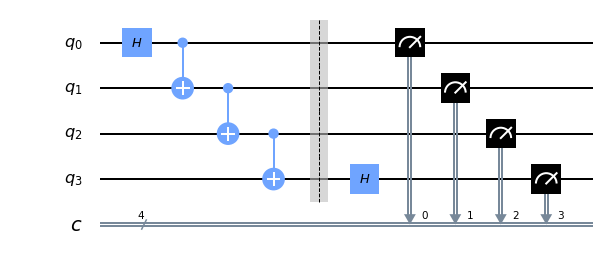

In [433]:
circ[3].draw(output = 'mpl')

In [416]:
backend = provider.get_backend('ibmq_vigo')
job_exp = qiskit.execute(circ,backend=backend )
job_monitor(job_exp)



IndexError: list index out of range

In [655]:
# 4-qubit bell state 
#n is total number of qubits
n = 5
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
circ = []

for i in range(0,3**n):
    circ.append(QuantumCircuit(q, c))
    circ[i].h(0)
    circ[i].cx(0,1)
    circ[i].cx(1,2)
    circ[i].cx(2,3)
    circ[i].cx(3,4)
    circ[i].barrier()

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                for m in range(3):
                    if i == 0: 
                        circ[count].h(0)
                    elif i == 1:
                        circ[count].s(0).inverse()
                        circ[count].h(0)
                    if j == 0:
                        circ[count].h(1)
                    elif j == 1:
                        circ[count].s(1).inverse()
                        circ[count].h(1)
                    if k == 0:
                        circ[count].h(2)
                    elif k == 1:
                        circ[count].s(2).inverse()
                        circ[count].h(2)
                    if l == 0:
                        circ[count].h(3)
                    elif l == 1:
                        circ[count].s(3).inverse()
                        circ[count].h(3)
                    if m == 0:
                        circ[count].h(4)
                    elif m == 1:
                        circ[count].s(4).inverse()
                        circ[count].h(4) 
                    count += 1


    
        
for i in range(0,3**n):
    circ[i].measure(q,c)

In [645]:
circ_Va = circ[0:75]

In [646]:
backend = provider.get_backend('ibmq_vigo')
job_exp = qiskit.execute(circ_Va,backend=backend )
job_monitor(job_exp)

Job Status: job has successfully run                       


In [647]:
circ_Vb = circ[75: 2*75]

In [648]:
job_exp = qiskit.execute(circ_Vb,backend=backend )
job_monitor(job_exp)

Job Status: job has successfully run                     


In [649]:
circ_Vc = circ[2*75: 3*75]
job_exp = qiskit.execute(circ_Vc,backend=backend )
job_monitor(job_exp)


Job Status: job has successfully run                     


In [658]:
circ_Vd = circ[3*75:3**n]
job_exp = qiskit.execute(circ_Vd,backend=backend )
job_monitor(job_exp)


Job Status: job has successfully run                  
